# Show the disaggregator overview

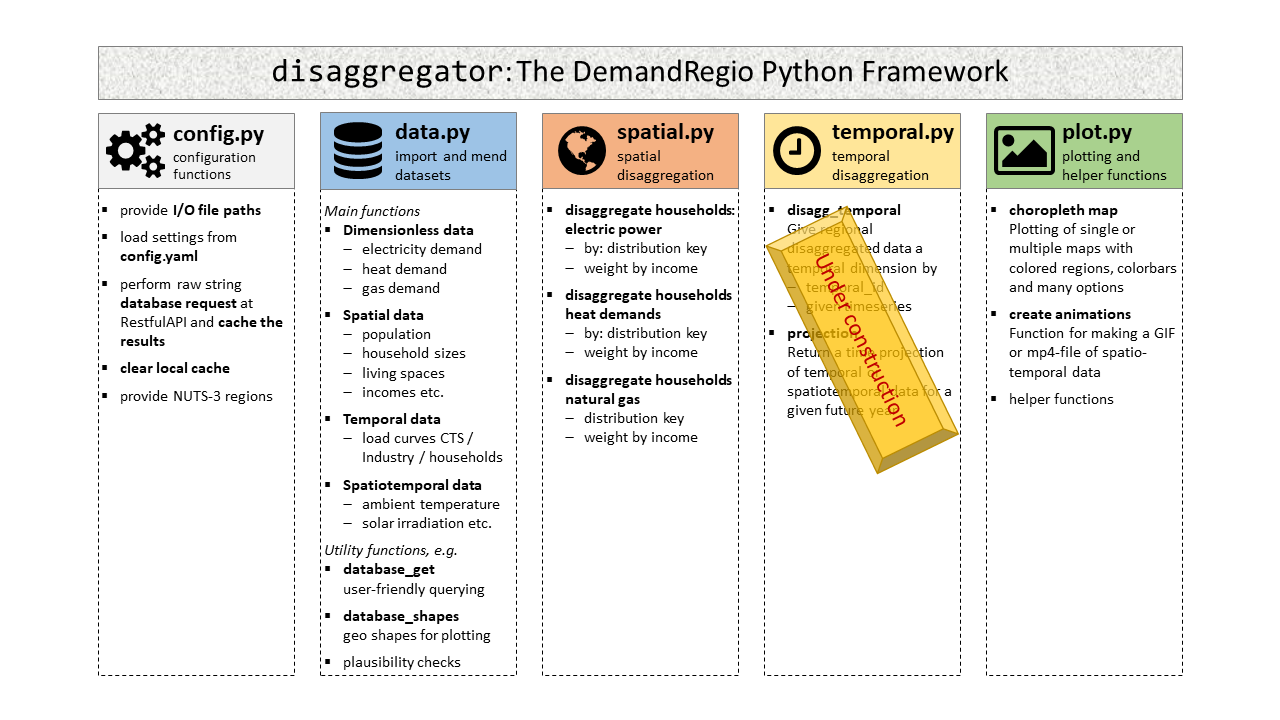

In [1]:
from IPython.display import Image
pic = Image(filename=('./img/overview.png'))
pic

# Introduction

## Module `config.py`

The `config.py`-module is resonsible for all configuration needs of the entire program. This encompasses tasks such as, but not limited to:
- making I/O paths available,
- processing the contents of the `config.yaml`-file,
- establishing a connection to the demandregio database through a RESTful-API and
- providing data assignments based on dictionaries.

In [2]:
from disaggregator import config

Load config from the ``config.yaml``-file and get a value from a key, e.g.:

In [3]:
cfg = config.get_config()
cfg['database_host']

'http://opendata.ffe.de:4000/'

A typical example for assignments are those between the NUTS-3-code and its real-world name of the 401 regions in Germany. These can be accessed through:

In [4]:
dict_nuts3_name = config.region_id_to_nuts3(nuts3_to_name=True)
dict_nuts3_name

{'DE915': 'Göttingen',
 'DE919': 'Osterode am Harz',
 'DEF01': 'Flensburg, Kreisfreie Stadt',
 'DEF02': 'Kiel, Kreisfreie Stadt',
 'DEF03': 'Lübeck, Kreisfreie Stadt',
 'DEF04': 'Neumünster, Kreisfreie Stadt',
 'DEF05': 'Dithmarschen',
 'DEF06': 'Herzogtum Lauenburg',
 'DE278': 'Günzburg',
 'DEF07': 'Nordfriesland',
 'DEF08': 'Ostholstein',
 'DEF09': 'Pinneberg',
 'DEF0A': 'Plön',
 'DEF0B': 'Rendsburg-Eckernförde',
 'DEF0C': 'Schleswig-Flensburg',
 'DEF0D': 'Segeberg',
 'DEF0E': 'Steinburg',
 'DEF0F': 'Stormarn',
 'DE600': 'Hamburg',
 'DE911': 'Braunschweig, Kreisfreie Stadt',
 'DE912': 'Salzgitter, Kreisfreie Stadt',
 'DE913': 'Wolfsburg, Kreisfreie Stadt',
 'DE914': 'Gifhorn',
 'DE916': 'Goslar',
 'DE917': 'Helmstedt',
 'DE918': 'Northeim',
 'DE91A': 'Peine',
 'DE91B': 'Wolfenbüttel',
 'DE91C': 'Göttingen',
 'DE929': 'Region Hannover',
 'DE922': 'Diepholz',
 'DE923': 'Hameln-Pyrmont',
 'DE925': 'Hildesheim',
 'DE926': 'Holzminden',
 'DE927': 'Nienburg (Weser)',
 'DE928': 'Schaumburg'

## Modules `data.py` and `plot.py`

The `data.py`-module is resposible for providing 
- all relevant datasets (dimensionless, spatial, temporal and spatiotemporal) in a clear and structured manner,
- access the demandregio-database in a comfortable way and
- some handy utility functions.

The `plot.py`-module provides plotting functions such as
- spatial data: geographical choropleth maps
- temporal data: multidimensional line/bar/scatter charts
- spatiotemporal data: animations.

In [5]:
from disaggregator import data, plot

The demandregio database contains both **spatial** and **temporal** datasets.

To have a look, what different **spatial datasets** are available, we do:

In [6]:
df_spatial = data.database_description('spatial')
df_spatial

,title,description_short,region_types,internal_id_description,units,years
id_spatial,,,,,,
1,Einwohnerzahl,Einwohnerzahl zum Stand 31.12.,[lk],NaN,Einwohner,"[1997, 1998, 1999, 2000, 2001, 2002, 2003, 200..."
2,Stromverbrauch private Haushalte,Stromverbrauch der privaten Haushalte nach BMW...,[land],NaN,MWh,"[1991, 1992, 1993, 1994, 1995, 1996, 1997, 199..."
3,Stromverbrauch je Einwohner,spezifischer Stromverbrauch je Einwohner nach ...,[land],NaN,MWh/Einwohner,"[1997, 1998, 1999, 2000, 2001, 2002, 2003, 200..."
4,Stromverbrauch private Haushalte,Stromverbrauch der privaten Haushalte,[lk],NaN,MWh,"[1997, 1998, 1999, 2000, 2001, 2002, 2003, 200..."
5,Heizstrukturen (Lkr),Heizstrukturen auf Landkreisebene je Wohneinheit,[lk],internal_id[1] = Heizsystem (bzw. Energieträge...,Anzahl Wohneinheiten,[2018]
6,Wirtschaftsentwicklung (BWS),"Wirtschaftsentwicklung (BWS), Bruttowertschöpf...",[land],NaN,Mrd. Euro,"[2012, 2020, 2030, 2040, 2050]"
7,Wirtschaftsentwicklung (BIP),"Wirtschaftsentwicklung (BIP), Bruttoinlandspro...",[land],NaN,Mrd. Euro,"[2012, 2020, 2030, 2040, 2050]"
8,Bevölkerungsentwicklung (NEP),"Bevölkerungsentwicklung (NEP, Tabelle 26), nac...",[land],NaN,Einwohner,"[2012, 2020, 2030, 2040, 2050]"
9,Nettostromverbrauch,Klassischer Nettostromverbrauch inkl. VNB-Netz...,[land],NaN,TWh,"[2008, 2013, 2015, 2030]"


... and for **temporal datasets** we do:

In [7]:
df_temporal = data.database_description('temporal')
df_temporal

disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_temporal_description


,title,description_short,region_types,internal_id_description,units,time_step,years_step,years_weather
id_temporal,,,,,,,,
1,Wochentag,Zeitstrahl mit den Wochentagen,[land],None,Wochentag,1 Std,"[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200...","[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200..."
2,Meteorologische Jahreszeiten,"Meteorologische Jahreszeiten (Dez-Feb: 1, Mrz-...",[land],None,Jahreszeit,1 Std,"[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200...","[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200..."
3,Stunde des Tages,Stunde des Tages (mit Zeitumstellung),[land],None,Stunde,1 Std,"[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200...","[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200..."
4,SLP H0,Standardlastprofil (H0) private Haushalte (15 ...,[land],"[season (1..4), day (1..7), hh (0..23), mm (0....",None,15 Min,None,None
5,SLP H0,Standardlastprofil (H0) private Haushalte (1 S...,[land],"[season (1..4), day (1..7), hh (0..23)]",None,1 Std,None,None
6,Private Haushalte (H0),Lastgang der privaten Haushalte nach H0 (normi...,[land],,MW/MWh,1 Std,"[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200...","[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200..."
7,Private Haushalte,Lastgang der privaten Haushalte nach H0 skalie...,[lk],None,MW,1 Std,"[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200...","[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200..."
8,Globalstrahlung,Globalstrahlung nach CAMS (1 Std),[lk],None,Wh/m2,1 Std,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201..."
9,Tag des Jahres,Tag des Jahres: 1..365/366 in stündlicher Aufl...,[land],None,Tag des Jahres,1 Std,"[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200...","[1995, 1996, 1997, 1998, 1999, 2000, 2001, 200..."


Load **population** per region. This dataset is one-dimensional and returned as a ``pandas.Series`` see here:

In [8]:
df_pop = data.population()
df_pop.head()

nuts3
DE111    623738
DE112    381281
DE113    524127
DE114    252749
DE115    534074
Name: value, dtype: int64

Load **household sizes** per region. This dataset is two-dimensional and returned as a ``pandas.DataFrame`` see here:

In [9]:
df_HH = data.households_per_size()
df_HH.head()

disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.14&&year=eq.2011&&value=gt.0.0


hh_size,1,2,3,4,5,6
nuts3,,,,,,
DE111,137719,92772,37918,27768,9507,4684
DE112,54428,53829,25284,22383,7146,3012
DE113,81435,76939,34430,29628,8930,3726
DE114,34850,35921,17152,14745,4701,2017
DE115,81426,80782,34042,30250,9038,3793


So single-households are in column ``1``, households /w two persons are in column ``2`` and so on...    
***Please note***: Column ``6`` contains all household sizes with more than five persons.

Now, it could happen that you think that the values in one region are somewhat remarkable or special (very high, very low, variating in size...) in contrast to the surroung regions, e.g.:

In [10]:
df_HH.loc['DE27D':'DE402']

hh_size,1,2,3,4,5,6
nuts3,,,,,,
DE27D,15136,15581,8976,8452,3223,1364
DE27E,24415,22718,9287,8370,2865,1190
DE300,941959,593799,211718,115622,35369,19329
DE401,15992,14478,4917,2095,463,195
DE402,23910,19369,6826,2901,652,281


As you can see region with nuts3-ID `DE300` is a lot higher than the two around. For this case, it is useful to quickly get to know the name of that regions for a better unterstanding. This can be done easily with the function `append_region_name(df)`:

In [11]:
data.append_region_name(df_HH.loc['DE27D':'DE402'])

hh_size,1,2,3,4,5,6,region_name
nuts3,,,,,,,
DE27D,15136,15581,8976,8452,3223,1364,Donau-Ries
DE27E,24415,22718,9287,8370,2865,1190,Oberallgäu
DE300,941959,593799,211718,115622,35369,19329,Berlin
DE401,15992,14478,4917,2095,463,195,"Brandenburg an der Havel, Kreisfreie Stadt"
DE402,23910,19369,6826,2901,652,281,"Cottbus, Kreisfreie Stadt"


Or, a bit more elegant and pythonic, just like this:

In [12]:
df_HH.loc['DE27D':'DE402'].pipe(data.append_region_name)

hh_size,1,2,3,4,5,6,region_name
nuts3,,,,,,,
DE27D,15136,15581,8976,8452,3223,1364,Donau-Ries
DE27E,24415,22718,9287,8370,2865,1190,Oberallgäu
DE300,941959,593799,211718,115622,35369,19329,Berlin
DE401,15992,14478,4917,2095,463,195,"Brandenburg an der Havel, Kreisfreie Stadt"
DE402,23910,19369,6826,2901,652,281,"Cottbus, Kreisfreie Stadt"


So after this step it becomes clear, why these region's values are that high: It is simply Berlin, the biggest city.

One further important dataset is that containing the **living spaces in [m²]** by _building type_ for each region.
building types:
- `1FH`: one family house
- `2FH`: two family house
- `MFH_03_06`: multi family house for 3-6 families
- `MFH_07_12`: multi family house for 7-12 families
- `MFH_13_99`: multi family house for >12 families

In [13]:
df_ls = data.living_space()
df_ls.head()

building_type,1FH,2FH,MFH_03_06,MFH_07_12,MFH_13_99
nuts3,,,,,
DE111,"6,467,073.293","3,886,103.193","15,416,899.247","13,363,804.320","6,994,462.508"
DE112,"12,346,337.281","6,275,660.779","6,960,357.040","4,635,724.081","2,964,335.625"
DE113,"15,890,294.756","8,299,047.017","11,516,670.684","6,188,002.651","2,831,606.091"
DE114,"8,801,002.424","5,449,381.984","4,705,220.233","2,113,875.686","930,656.519"
DE115,"16,249,955.136","7,998,501.290","11,195,475.269","6,787,351.424","3,116,009.645"


Now let's plot these datasets as a choropleth map:

disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_vg250_krs_simple?toleranz=eq.1000&&stand=eq.%272016-12-31%27&&select=id_ags,gen,geom_as_text,fl_km2


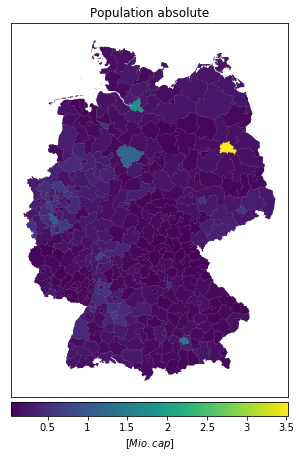

In [14]:
fig, ax = plot.choropleth_map(df_pop/1e6, relative=False, unit='Mio. cap', axtitle='Population absolute')

As you can see, this is an <u>absolute</u> illustration, as it just shows the number of persons living in each region.  
  
Though this might be the most intuitive way, it contains **two severe problems**:  
1. Since the population in the biggest city (Berlin) is almost *twice as big* as in the second-largest city of Hamburg and more than 3 times bigger as in the fourth-largest city (Cologne), but most of the rural areas have **way less** residents, the colorbar scaling does not provide good information.  


2. The illustration does not take into account the size of the different regions. So, even if $-$ theoretically $-$ all people would be distributed equally over Germany, bigger regions would always show more residents than smaller ones.  
  
The **solution** is a <u>relative</u> illustration, showing the population per region as a proportion of the underlying area size in square-kilometers:

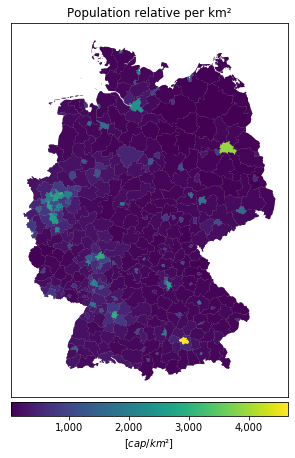

In [15]:
fig, ax = plot.choropleth_map(df_pop, relative=True, unit='cap', axtitle='Population relative per km²')

Now, this graphic shows a lot better, which areas are more densely and which are less densely populated.  

However, the two largest cities (Berlin and Munich) with ~4000+ residents/km² still kind of stick out. If we want to learn, where other densely populated areas are, it might be helpful to limit the colorization interval from zero to 3000:

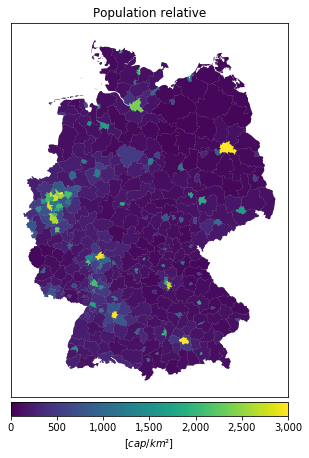

In [16]:
fig, ax = plot.choropleth_map(df_pop, relative=True, unit='cap', axtitle='Population relative', interval=(0,3000))

Now let's plot the households on a map:

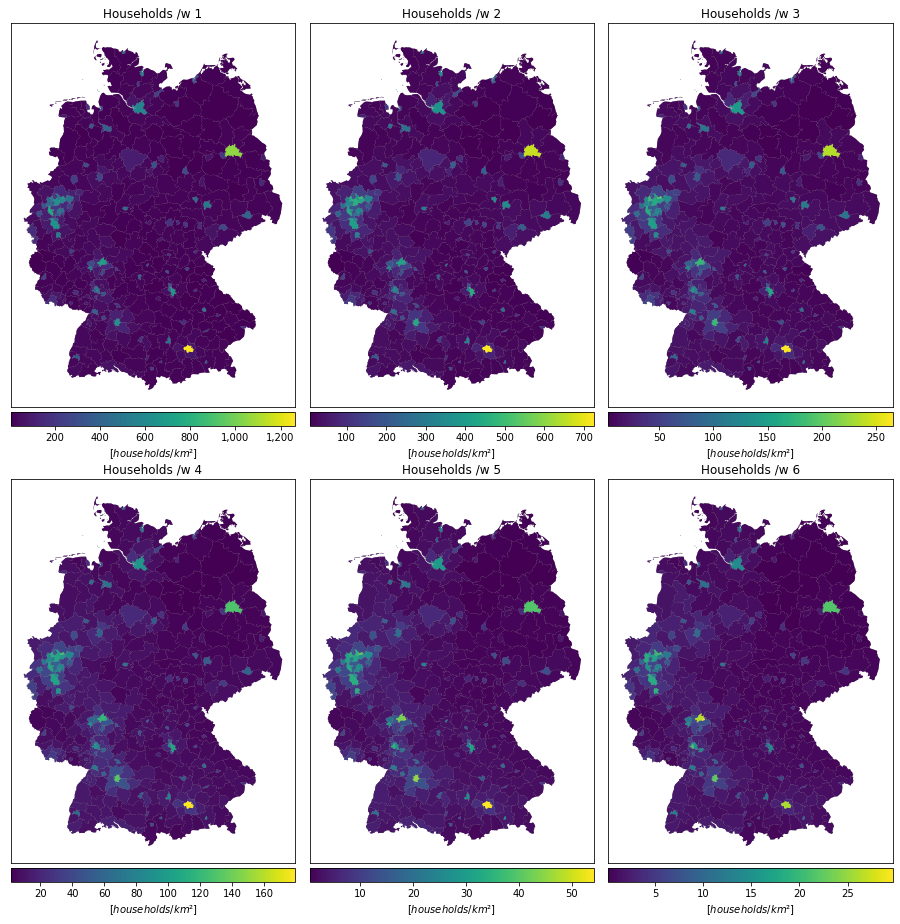

In [17]:
fig, ax = plot.choropleth_map(df_HH, relative=True, unit='households', axtitle='Households /w', colorbar_each_subplot=True, add_percentages=False)

As you can see, the framework recognizes automatically that this dataset contains several data columns and creates a subplot for each column.
Still, it might be that you are not interested in the distribution of each household size, but the sum of all, e.g. to compare if the distribution of households corresponds to the distribution of the population. Let's do this:

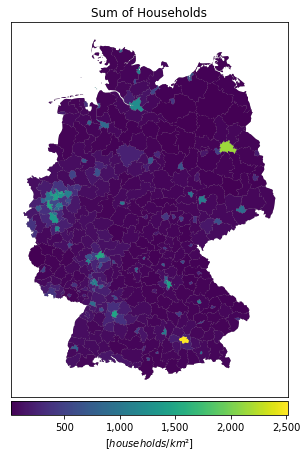

In [18]:
fig, ax = plot.choropleth_map(df_HH.sum(axis=1), relative=True, unit='households', axtitle='Sum of Households')

So what about the living space distribution. Is it comparable to the households?

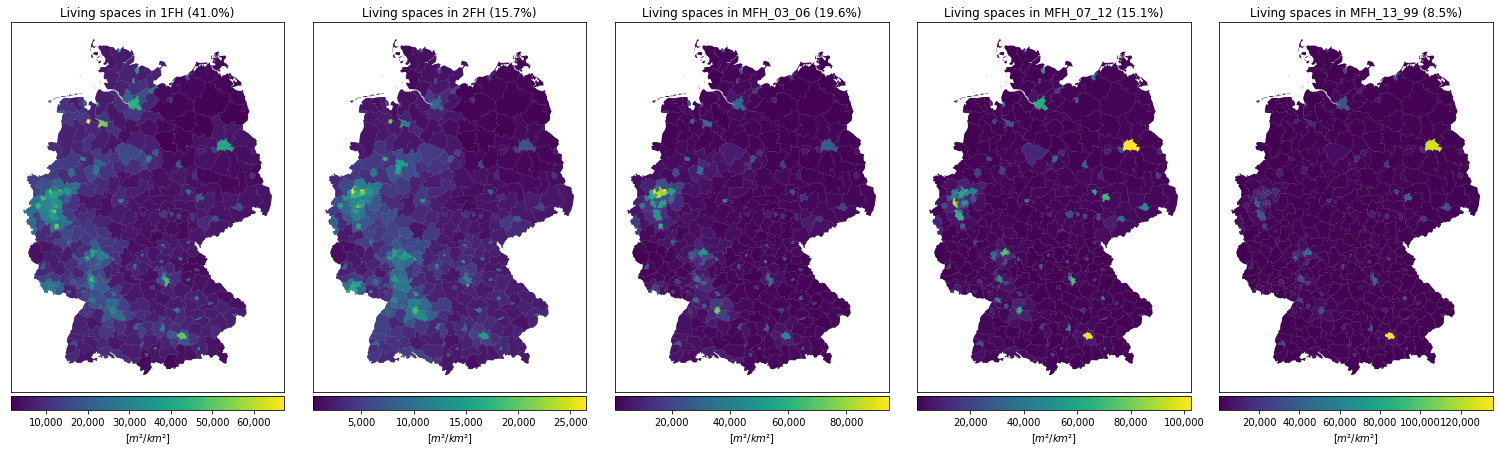

In [19]:
fig, ax = plot.choropleth_map(df_ls, relative=True, unit='m²', axtitle='Living spaces in', colorbar_each_subplot=True)

Now let's have a look at the **income distribution**:

In [20]:
df_inc = data.income(by='population')
df_inc.head()

nuts3
DE111    24672
DE112    24100
DE113    24441
DE114    23455
DE115    24671
Name: value, dtype: int64

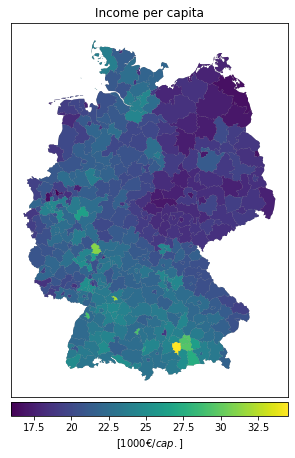

In [21]:
fig, ax = plot.choropleth_map(df_inc/1e3, relative=False, unit='1000 €/cap.', axtitle='Income per capita')

Now save this figure e.g. as PDF file:

In [22]:
from disaggregator.config import _data_out
#fig.savefig(_data_out('income_distribution.pdf'), bbox_inches='tight')